In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import numpy as np
plt.rcParams['animation.ffmpeg_path'] = '/Users/chris/Downloads/ffmpeg'
c1 = mpl.colormaps['viridis']

cmds = open('./data.txt', 'r').read()

sw = 7
compare = [0] * sw
stage = [[6] * sw]

def enlarge_stage(space_needed, max_rock):
    clear_rows = len(stage) - max_rock - 1
    if clear_rows > space_needed + 3:
        return
    stage.extend([[0] * sw for i in range(space_needed + 3 - clear_rows)])

def find_max():
    for i in range(len(stage) - 1, -1, -1):
        if stage[i] != compare:
            break
    return i

class Wide:
    @staticmethod
    def height():
        return 1
    @staticmethod
    def l(x, y):
        if x == 0:
            return True
        return stage[y][x - 1] > 0
    @staticmethod
    def r(x, y):
        if x == sw - 4:
            return True
        return stage[y][x + 4] > 0
    @staticmethod
    def d(x, y):
        return any(map(lambda i: stage[y - 1][x + i] > 0, range(4)))
    @staticmethod
    def insert_at(x, y):
        for i in range(4):
            stage[y][x + i] = 1

class Tall:
    @staticmethod
    def height():
        return 4
    @staticmethod
    def l(x, y):
        if x == 0:
            return True
        return any(map(lambda i: stage[y + i][x - 1] > 0, range(4)))
    @staticmethod
    def r(x, y):
        if x == sw - 1:
            return True
        return any(map(lambda i: stage[y + i][x + 1] > 0, range(4)))
    @staticmethod
    def d(x, y):
        return stage[y - 1][x] > 0
    @staticmethod
    def insert_at(x, y):
        for i in range(4):
            stage[y + i][x] = 4

class Square:
    @staticmethod
    def height():
        return 2
    @staticmethod
    def l(x, y):
        if x == 0:
            return True
        return any(map(lambda i: stage[y + i][x - 1] > 0, range(2)))
    @staticmethod
    def r(x, y):
        if x == sw - 2:
            return True
        return any(map(lambda i: stage[y + i][x + 2] > 0, range(2)))
    @staticmethod
    def d(x, y):
        return any(map(lambda i: stage[y - 1][x + i] > 0, range(2)))
    @staticmethod
    def insert_at(x, y):
        for j in range(2):
            for i in range(2):
                stage[y + i][x + j] = 5

class Plus:
    @staticmethod
    def height():
        return 3
    @staticmethod
    def l(x, y):
        if x == 0:
            return True
        tests = [(x, y), (x - 1, y + 1), (x, y + 2)]
        return any(map(lambda p: stage[p[1]][p[0]] > 0, tests))
    @staticmethod
    def r(x, y):
        if x == sw - 3:
            return True
        tests = [(x + 2, y), (x + 3, y + 1), (x + 2, y + 2)]
        return any(map(lambda p: stage[p[1]][p[0]] > 0, tests))
    @staticmethod
    def d(x, y):
        tests = [(x, y), (x + 1, y - 1), (x + 2, y)]
        return any(map(lambda p: stage[p[1]][p[0]] > 0, tests))
    @staticmethod
    def insert_at(x, y):
        stage[y][x + 1] = 2
        stage[y + 2][x + 1] = 2
        for i in range(3):
            stage[y + 1][x + i] = 2

class El:
    @staticmethod
    def height():
        return 3
    @staticmethod
    def l(x, y):
        if x == 0:
            return True
        tests = [(x - 1, y), (x + 1, y + 1), (x + 1, y + 2)]
        return any(map(lambda p: stage[p[1]][p[0]] > 0, tests))
    @staticmethod
    def r(x, y):
        if x == sw - 3:
            return True
        tests = [(x + 3, y), (x + 3, y + 1), (x + 3, y + 2)]
        return any(map(lambda p: stage[p[1]][p[0]] > 0, tests))
    @staticmethod
    def d(x, y):
        tests = [(x, y - 1), (x + 1, y - 1), (x + 2, y - 1)]
        return any(map(lambda p: stage[p[1]][p[0]] > 0, tests))
    @staticmethod
    def insert_at(x, y):
        stage[y + 1][x + 2] = 3
        stage[y + 2][x + 2] = 3
        for i in range(3):
            stage[y][x + i] = 3

shapes = [Wide, Plus, El, Tall, Square]

In [14]:
test_cmds = '>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>'

stage = [[6] * sw]

fallen_rocks = 0
stop_at = 2022

shape_index = 0
cur_shape = shapes[shape_index]

c_i = -1

def get_start():
    max = find_max()
    needed = 3 + cur_shape.height()
    enlarge_stage(needed, max)
    return (2, max + 4)

x, y = get_start()

while fallen_rocks < stop_at:
    c_i += 1
    if c_i >= len(cmds):
        c_i = 0
    cm = cmds[c_i]
    if cm == '<':
        x = x - 1 if not cur_shape.l(x, y) else x
    elif cm == '>':
        x = x + 1 if not cur_shape.r(x, y) else x
    
    down = cur_shape.d(x, y)
    if down:
        fallen_rocks += 1
        cur_shape.insert_at(x, y)
        shape_index += 1
        if shape_index >= len(shapes):
            shape_index = 0
        cur_shape = shapes[shape_index]
        x, y = get_start()
    else:
        y = y - 1

final = find_max()
final

3153

In [ ]:
p2_stop = 1000000000000



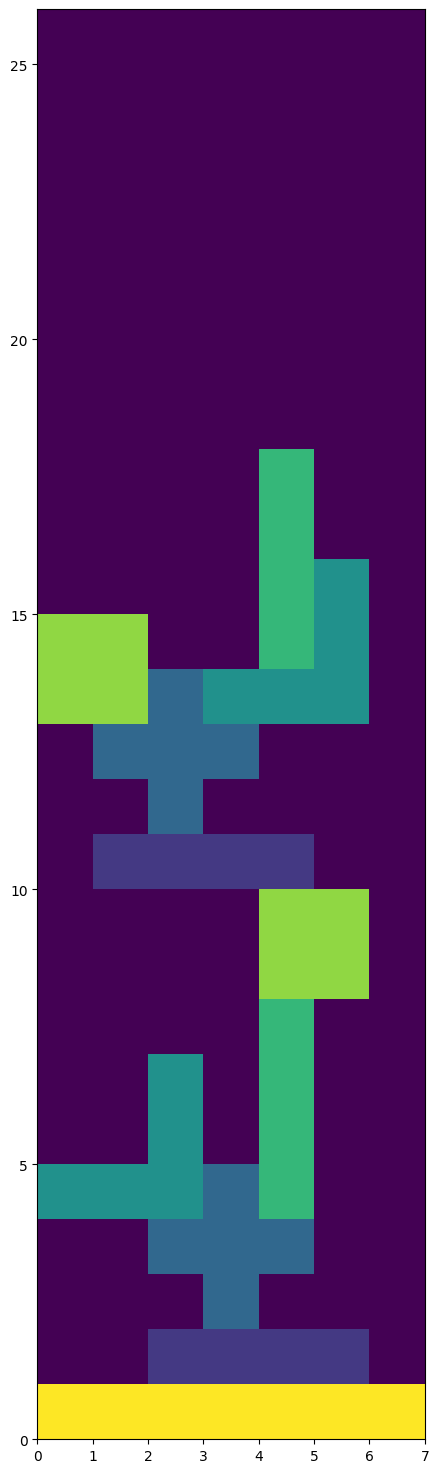

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5 * (len(stage) / 7)))
ax.pcolormesh(stage, cmap=c1, rasterized=True, vmin=0, vmax=6)